##### **Exploratory Data Analysis (EDA) Taitanic**

In [2]:
# sibsp - Number of Siblings/Spouses Aboard. 
# parch - Number of Parents/Children Aboard.

In [3]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import logging
import os
import sys

In [4]:

# Configuring logging
log_file = 'LOG_titanic_EDA.log'
logging.basicConfig(
    filename=log_file,
    filemode='a',
    format='%(asctime)s - %(levelname)s - %(message)s',
    datefmt='%Y-%m-%d %H:%M:%S',
    level=logging.INFO,
    encoding='utf-8',
    errors='ignore'
)

def prompt_file_path() -> str:
    """
    Prompt the user to enter a file path or quit the program.

    return:
        str: A valid file path entered bhy the user.
    """
    
    while True:
        file_path = input('Please enter a valid file path or "q" to exit.').strip()
        
        if file_path.lower() == 'q':
            logging.info('User chosen to exit.')
            sys.exit(1)
        
        if file_path:
            logging.info('A valid file path has been entered.')
            return os.path.abspath(file_path)
        logging.warning('The file path is empty. Please provide a valid file path.')    

def validate_file_path(file_path: str) -> str:
    """
    Validate if the provided file path exists. If not, prompt the user for a valid file path.

    Args:
        file_path (str): The initial file path.

    Returns:
        str: A valid file path that exists.
    """
    
    while not os.path.exists(file_path):
        logging.error(f'File not found at: "{file_path}". Please try again.')
        file_path = prompt_file_path()
    
    logging.info(f'File found at: {file_path}.')
    return file_path
    
def load_dataset(file_path: str) -> pd.DataFrame:
    """
    Load the dataset from the specified file path into a Pandas DataFrame.

    Args:
        file_path (str): Path to the dataset file.

    Returns:
        pd.DataFrame: Loaded dataset as a DataFrame.
    """
    
    while True:
        try:
            valid_path = validate_file_path(file_path)
            df = pd.read_csv(filepath_or_buffer=valid_path, encoding='utf-8')
            logging.info(f'Dataset successfully loaded from: {valid_path}.')
            return df
        except pd.errors.EmptyDataError:
            logging.error(f'The file is empty. Please provide a valid dataset file.' )
        except pd.errors.ParserError:
            logging.error('Error occured while parsing the file. Please check the file format.')
        except Exception as e:
            logging.error(f'Error occurred while reading the dataset: {e}.')
            sys.exit(1)
            
        file_path = prompt_file_path()

In [5]:
console_handler = logging.StreamHandler(sys.stdout)
console_handler.setLevel(logging.INFO)
console_handler.setFormatter(logging.Formatter('- %(message)s'))
logging.getLogger().addHandler(console_handler)

In [6]:
# Loading Titanic dataset
if __name__ == '__main__':
    logging.info('Starting dataset loading process...')
    initial_path = './data/titanic.csv'
    dataset = load_dataset(initial_path)
    logging.info('Dataset loaded successfully.')
    
dataset.head()

- Starting dataset loading process...
- File found at: ./data/titanic.csv.
- Dataset successfully loaded from: ./data/titanic.csv.
- Dataset loaded successfully.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# Logging the shape of the
logging.info(f'The loaded dataset has {dataset.shape[0]} rows and {dataset.shape[1]} columns.')

# Logging the names of the columns of the dataset
logging.info(f'Columns of the dataset: {list(dataset.columns)}')

- The loaded dataset has 418 rows and 12 columns.
- Columns of the dataset: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [35]:
# Displaying the first 5 rows of the dataset
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
# Logging total memory usage of the dataset
total_memory_kb = dataset.memory_usage(deep=True).sum() / 1024
logging.info(f'Total memory usage of the dataset: {total_memory_kb:.2f} KB')

# Logging memory usage of each column in the dataset
logging.info('Memory usage of each column:')
for col, usage in dataset.memory_usage(deep=True).items():
    logging.info(f'{col}: \t{(usage):.2f} bytes')

- Total memory usage of the dataset: 134.29 KB
- Memory usage of each column:
- Index: 	132.00 bytes
- PassengerId: 	3344.00 bytes
- Survived: 	3344.00 bytes
- Pclass: 	3344.00 bytes
- Name: 	31970.00 bytes
- Sex: 	22458.00 bytes
- Age: 	3344.00 bytes
- SibSp: 	3344.00 bytes
- Parch: 	3344.00 bytes
- Ticket: 	23356.00 bytes
- Fare: 	3344.00 bytes
- Cabin: 	15294.00 bytes
- Embarked: 	20900.00 bytes


In [10]:
# logging the data type of each column in the dataset
logging.info('The data type of each column in the dataset:')
for col, dtype in dataset.dtypes.items():
    logging.info(f'{col}: \t{dtype}')

- The data type of each column in the dataset:
- PassengerId: 	int64
- Survived: 	int64
- Pclass: 	int64
- Name: 	object
- Sex: 	object
- Age: 	float64
- SibSp: 	int64
- Parch: 	int64
- Ticket: 	object
- Fare: 	float64
- Cabin: 	object
- Embarked: 	object


In [11]:
# Logging missing values in the dataset
logging.info('Missing values in the dataset:')
for col in dataset.columns:
    missing_values = dataset[col].isnull().sum()
    percentage = (missing_values / len(dataset)) * 100
    logging.info(f'{col}: \t{missing_values} ({percentage:.2f}%)')

- Missing values in the dataset:
- PassengerId: 	0 (0.00%)
- Survived: 	0 (0.00%)
- Pclass: 	0 (0.00%)
- Name: 	0 (0.00%)
- Sex: 	0 (0.00%)
- Age: 	86 (20.57%)
- SibSp: 	0 (0.00%)
- Parch: 	0 (0.00%)
- Ticket: 	0 (0.00%)
- Fare: 	1 (0.24%)
- Cabin: 	327 (78.23%)
- Embarked: 	0 (0.00%)


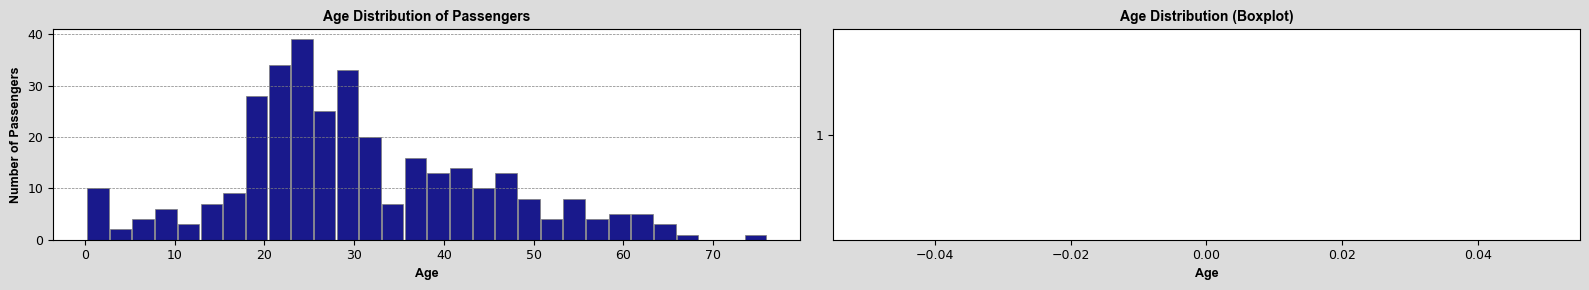

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 3), dpi=100, facecolor='gainsboro', edgecolor='k')

ax[0].set_title('Age Distribution of Passengers', fontdict={'font': 'arial', 'fontsize': 10, 'fontweight': 'bold', 'color': 'black'})
ax[0].hist(x=dataset['Age'],
        bins=30,
        density=False,
        histtype='bar',
        align='mid',
        orientation='vertical',
        rwidth=0.95,
        edgecolor='gray',
        linewidth=0.6,
        color='navy',
        alpha=0.9)
ax[0].set_xlabel('Age', fontdict={'font': 'arial', 'fontsize': 9, 'fontweight': 'bold', 'color': 'black'})
ax[0].set_ylabel(ylabel='Number of Passengers', fontdict={'font': 'arial', 'fontsize': 9, 'fontweight': 'bold', 'color': 'black'})
ax[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

ax[1].set_title('Age Distribution (Boxplot)', 
                fontdict={'font': 'arial', 'fontsize': 10, 'fontweight': 'bold', 'color': 'black'})
ax[1].boxplot(dataset['Age'], 
        vert=False, 
        patch_artist=True, 
        boxprops=dict(facecolor='navy', alpha=0.9))
ax[1].set_xlabel('Age', fontdict={'font': 'arial', 'fontsize': 9, 'fontweight': 'bold', 'color': 'black'})

# Customize ticks for both subplots
for axis in ax:
    axis.tick_params(axis='x', labelsize=9, colors='black')
    axis.tick_params(axis='y', labelsize=9, colors='black')

# Show the plot
plt.tight_layout()
plt.show()

In [13]:
# Handling Missing Values in the Age Column
"""
Boxplot appears empty: 
it because the dataset['Age'] column contains NaN (missing) values, and the boxplot function cannot display an empty or all-NaN series. 
To fix this, you need to handle missing values in the Age column before plotting.
"""

"\nBoxplot appears empty: \nit because the dataset['Age'] column contains NaN (missing) values, and the boxplot function cannot display an empty or all-NaN series. \nTo fix this, you need to handle missing values in the Age column before plotting.\n"

In [14]:
# Information about missing values in the Age column
logging.info('Information about missing values in the Age column:')

missing_values = dataset['Age'].isnull().sum()
percentage = (missing_values / len(dataset)) * 100
logging.info(f'Total missing values: {missing_values}')
logging.info(f'Percentage of missing values; {percentage:.2f}%')

- Information about missing values in the Age column:
- Total missing values: 86
- Percentage of missing values; 20.57%


##### **Removing missing values**

In [15]:
# Indices of Missing Values

indices = dataset.loc[dataset['Age'].isnull()].index
indices

Index([ 10,  22,  29,  33,  36,  39,  41,  47,  54,  58,  65,  76,  83,  84,
        85,  88,  91,  93, 102, 107, 108, 111, 116, 121, 124, 127, 132, 133,
       146, 148, 151, 160, 163, 168, 170, 173, 183, 188, 191, 199, 200, 205,
       211, 216, 219, 225, 227, 233, 243, 244, 249, 255, 256, 265, 266, 267,
       268, 271, 273, 274, 282, 286, 288, 289, 290, 292, 297, 301, 304, 312,
       332, 339, 342, 344, 357, 358, 365, 366, 380, 382, 384, 408, 410, 413,
       416, 417],
      dtype='int64')

In [16]:
# Function to drop missing values
def remove_missing_values_a(dataset, indices):
    dataset = dataset.drop(index=indices, inplace=True, axis=0, errors='ignore')
    return dataset

def remove_missing_values_b(dataset):
    dataset = dataset.dropna(subset=['Age'], inplace=True, axis=0, errors='ignore')
    return dataset

##### **Imputation (Replacing Missing Values)**

###### **# Imputation with the mean**

In [17]:
# Replacing missing values with the mean of the Age column
def replace_missing_values_a(dataset):
    dataset = dataset['Age'].replace(to_replace=np.nan, value=dataset['Age'].mean(), inplace=True)
    return dataset

def replace_missing_values_b(dataset):
    dataset = dataset['Age'].fillna(value=dataset['Age'].mean(), inplace=True)
    return dataset


###### **# Imputation with the median**

In [18]:
# Replacing missing values with the median of the Age column
def replace_missing_values_c(dataset):
    dataset = dataset['Age'].replace(to_replace=np.nan, value=dataset['Age'].median(), inplace=True, axis=0)
    return dataset

def replace_missing_values_d(dataset):
    dataset = dataset['Age'].fillna(value=dataset['Age'].median(), inplace=True, axis=0)
    return dataset

###### **# Imputation with the mode**

In [19]:
# Replacing missing values with the mode of the Age column
# The mode of the Age column
mode_values = dataset['Age'].mode()
mode_values
# Therefore, we have two alternatives here:

0    21.0
1    24.0
Name: Age, dtype: float64

In [20]:
# We can replace missing values with one of the mode values of the Age column. 
first_mode_value = mode_values[0]
def replace_missing_values_e(dataset):
    dataset = dataset['Age'].fillna(value=first_mode_value, inplace=True, axis=0)
    return dataset

# We can replace missing values with the mean of the mode values.
mode_values_mean = mode_values.mean().astype('int64')
def replace_missing_values_f(dataset):
    dataset = dataset['Age'].fillna(value=mode_values_mean, inplace=True, axis=0)
    return dataset

##### **# Group-Based Imputation**

In [21]:
# Analysis of missing values in the Age column Grouped by Sex and Pclass
# We can use the groupby() function to analyze the missing values in the Age column grouped by Sex and Pclass.

In [22]:
# Number of values in the Age column grouped by Sex and Pclass

dataset['Age'].groupby(by=[dataset['Sex'], dataset['Pclass']]).size()

Sex     Pclass
female  1          50
        2          30
        3          72
male    1          57
        2          63
        3         146
Name: Age, dtype: int64

In [23]:

# Analyzing missing values
isnull_df = dataset.groupby(by=['Sex','Pclass'])['Age'].aggregate(
    sum_missing = lambda x: x.isnull().sum(),
    count_rows = lambda x: x.size, # Or use len(X). Do not use x.count(), which returns the number of non-null values
    mean = lambda x: int(x.mean()),
    median = lambda x: int(x.median()),
    skewness = lambda x: x.skew(),
    percentage_missing = lambda x: f'{round(x.isnull().sum() / x.size * 100, 2)} %'
    )

# Displaying the results
isnull_df

sum_missing  count_rows  mean  median  skewness  \
Sex    Pclass                                                    
female 1                 2          50    41      41  0.209797   
       2                 1          30    24      24  0.647348   
       3                22          72    23      22 -0.082087   
male   1                 7          57    40      42 -0.364779   
       2                 4          63    30      28  0.671198   
       3                50         146    24      24  0.213786   

              percentage_missing  
Sex    Pclass                     
female 1                   4.0 %  
       2                  3.33 %  
       3                 30.56 %  
male   1                 12.28 %  
       2                  6.35 %  
       3                 34.25 %

In [24]:
for (grouping_key_1, grouping_key_2), values in dataset.groupby(by=['Sex', 'Pclass'])['Age']:
    print(f'Sex: [{grouping_key_1}] - Passenger Class: [{grouping_key_2}] Missing values: [{values.isnull().sum()}]')



Sex: [female] - Passenger Class: [1] Missing values: [2]
Sex: [female] - Passenger Class: [2] Missing values: [1]
Sex: [female] - Passenger Class: [3] Missing values: [22]
Sex: [male] - Passenger Class: [1] Missing values: [7]
Sex: [male] - Passenger Class: [2] Missing values: [4]
Sex: [male] - Passenger Class: [3] Missing values: [50]


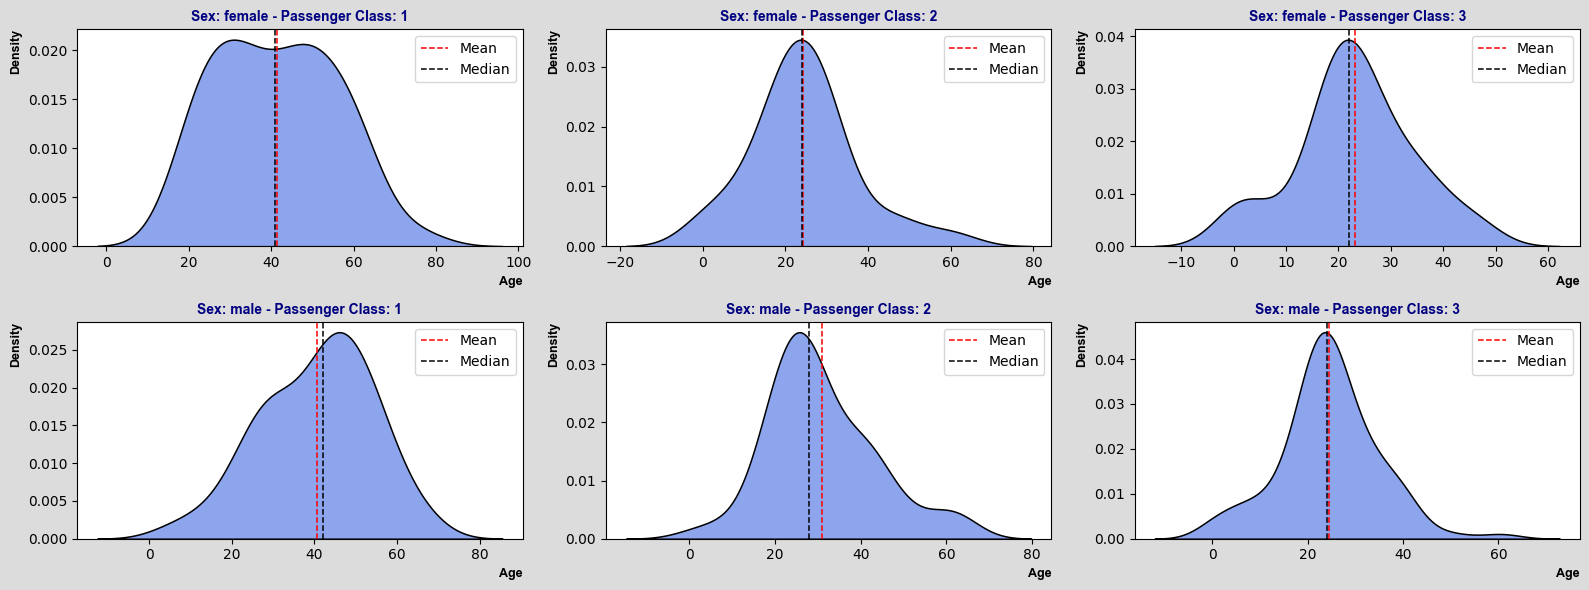

In [25]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16, 6), dpi=100, facecolor='gainsboro', edgecolor='k')
axes = ax.flatten()


for i, groups in enumerate(dataset.groupby(by=['Sex', 'Pclass'])['Age']):

        sns.kdeplot(data=groups[1],
                fill=True,
                color='royalblue',
                alpha=0.6,
                linewidth=1.1,
                edgecolor='black',
                ax=axes[i])
        axes[i].set_title(f'Sex: {groups[0][0]} - Passenger Class: {groups[0][1]}', fontdict={'font': 'arial', 'fontsize': 10, 'fontweight': 'bold', 'color': 'navy'})
        axes[i].set_xlabel('Age', fontdict={'font': 'arial', 'fontsize': 9, 'fontweight': 'bold', 'color': 'black'}, loc= 'right')
        axes[i].set_ylabel('Density', fontdict={'font': 'arial', 'fontsize': 9, 'fontweight': 'bold', 'color': 'black'}, loc= 'top')
        
        # mean line
        axes[i].axvline(x=groups[1].mean(), color='red', linestyle='--', linewidth=1.1, label='Mean')
        axes[i].axvline(x=groups[1].median(), color='black', linestyle='--', linewidth=1.1, label='Median')
        axes[i].legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
dataset.groupby(by=['Sex', 'Pclass'])['Age'].median()
plt.table(dataset.groupby(by=['Sex', 'Pclass'])['Age'].median())


##### **# Filling 'Age' based on median values grouped by 'Pclass' and 'Sex'**

In [ ]:
# Fill the missing Age values in each group with the median of the group
def replace_missing_values(dataset):
    dataset['Age'] = dataset.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
    return dataset
    


###### **# # Creating Age Groups**

In [ ]:
# Creating Age Groups

logging.info(f'The minimum age in the dataset: {dataset['Age'].min()} and the maximum age is {dataset['Age'].max()}.')
logging.info(f"Creating Age Groups '0-20', '20-40', '40-60', '60-80'")
dataset['Age_Groups'] = pd.cut(dataset['Age'], bins=[0, 20, 40, 60, 80], labels=['0-20', '20-40', '40-60', '60-80'], right=True)

- The minimum age in the dataset: 0.17 and the maximum age is 76.0.
- Creating Age Groups '0-20', '20-40', '40-60', '60-80'


##### **Predict Missing Values Using Machine Learning**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing

In [ ]:
one_hot_encoder = preprocessing.OneHotEncoder(sparse_output=False)
one_hot_encoder.fit(dataset[['Sex']])
encoded_sex = one_hot_encoder.transform(dataset[['Sex']])

In [ ]:
encoded_sex_df = pd.DataFrame(encoded_sex, columns=one_hot_encoder.get_feature_names_out(['Sex']))
encoded_sex_df

,Sex_female,Sex_male
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0
...,...,...
413,0.0,1.0
414,1.0,0.0
415,0.0,1.0
416,0.0,1.0


In [ ]:
dataset = pd.concat(objs=[dataset, encoded_sex_df], axis=1)
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Groups,Sex_female,Sex_male
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,20-40,0.0,1.0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,40-60,1.0,0.0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,60-80,0.0,1.0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,20-40,0.0,1.0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,20-40,1.0,0.0


In [ ]:
train_data = dataset[dataset['Age'].notna()]
test_data = dataset[dataset['Age'].isna()]

features = ['Pclass', 'Sex_female', 'Sex_male', 'SibSp', 'Parch', 'Fare']

X_train = train_data[features]
y_train = train_data['Age']

X_test = test_data[features]
y_test = test_data['Age']

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
pred_age = model.predict(X_test).astype(int)


In [ ]:
assert len(pred_age) == dataset['Age'].isna().sum(), "Mismatch between predicted and missing Age counts."

In [ ]:
dataset.loc[dataset['Age'].isna(), 'Age'] = pred_age

In [ ]:
logging.info(f'Number of missing values in the Age column: {dataset["Age"].isnull().sum()}') 

- Number of missing values in the Age column: 0


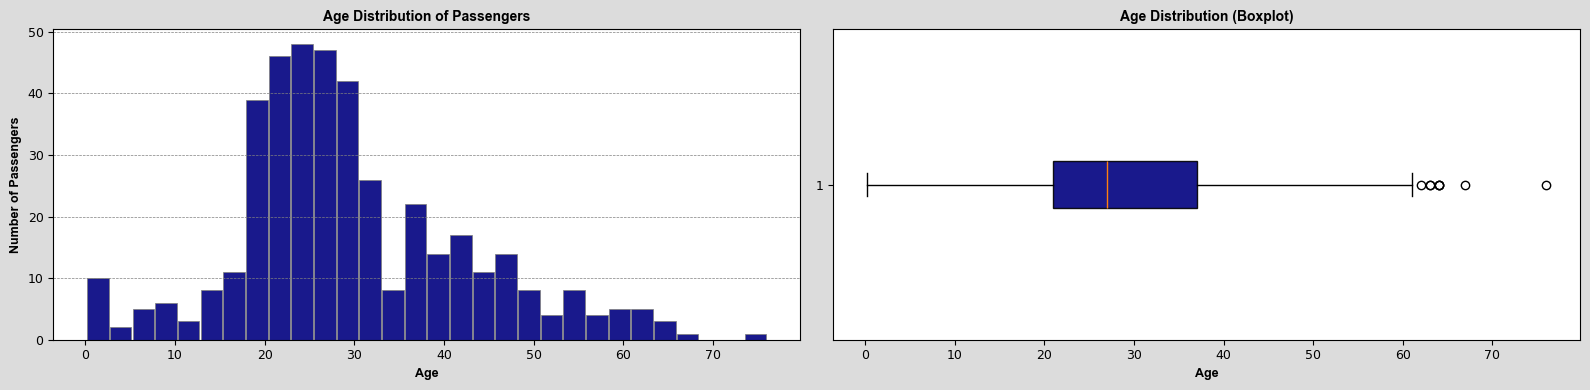

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4), dpi=100, facecolor='gainsboro', edgecolor='k')

ax[0].set_title('Age Distribution of Passengers', fontdict={'font': 'arial', 'fontsize': 10, 'fontweight': 'bold', 'color': 'black'})
ax[0].hist(x=dataset['Age'],
        bins=30,
        density=False,
        histtype='bar',
        align='mid',
        orientation='vertical',
        rwidth=0.95,
        edgecolor='gray',
        linewidth=0.6,
        color='navy',
        alpha=0.9)
ax[0].set_xlabel('Age', fontdict={'font': 'arial', 'fontsize': 9, 'fontweight': 'bold', 'color': 'black'})
ax[0].set_ylabel(ylabel='Number of Passengers', fontdict={'font': 'arial', 'fontsize': 9, 'fontweight': 'bold', 'color': 'black'})
ax[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

ax[1].set_title('Age Distribution (Boxplot)', 
                fontdict={'font': 'arial', 'fontsize': 10, 'fontweight': 'bold', 'color': 'black'})
ax[1].boxplot(dataset['Age'], 
        vert=False, 
        patch_artist=True, 
        boxprops=dict(facecolor='navy', alpha=0.9))
ax[1].set_xlabel('Age', fontdict={'font': 'arial', 'fontsize': 9, 'fontweight': 'bold', 'color': 'black'})

# Customize ticks for both subplots
for axis in ax:
    axis.tick_params(axis='x', labelsize=9, colors='black')
    axis.tick_params(axis='y', labelsize=9, colors='black')

# Show the plot
plt.tight_layout()
plt.show()